In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import os
import openai
import tiktoken
from retry import retry
openai.api_key_path = os.path.join("./secretkey.txt")

In [17]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")
possible_nums=range(1,11) # int from 1 to 10
possible_tokens = {f"{enc.encode(f'{i}')[0]}": 100 for i in possible_nums} 

In [18]:
@retry(tries=10, delay=3)
def random_number_generator() -> str:
    numba=openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[{
            'role': 'user',
            'content': 'Pick a random number from 1-10'
        }],
        logit_bias=possible_tokens,
        max_tokens=1,
        temperature=0.7).choices[0].message.content
    return numba

6
6


In [51]:
samples=200
random_numbers = [random_number_generator() for i in range(samples)]

6
8
5
5
9
7
6
6
7
6
6
6
6
8
7
7
6


Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600)

In [52]:
print(random_numbers)

['8', '7', '7', '7', '4', '7', '8', '6', '7', '7']


In [ ]:
import pandas as pd

df_random_numbers = pd.DataFrame()
df_random_numbers["random_numbers"] = [int(random_numbers[i]) for i in range(samples)]

In [24]:
df_random_numbers.to_csv("random.csv", index=False)

In [25]:
import seaborn as sns

In [26]:
from collections import Counter

In [27]:
serie_rn = pd.Series(Counter(list(df_random_numbers["random_numbers"])))

In [40]:
serie_rn_pct = 100*serie_rn/samples

In [41]:
df = pd.DataFrame()
df['number'] = serie_rn.index
df['counter'] = serie_rn.values

In [42]:
df_final = pd.DataFrame()
df_final["number"] = [i for i in range(1,11)]

In [43]:
df_final = df_final.set_index("number")

In [44]:
df = df.set_index("number")

In [45]:
df_final["counters"] = df["counter"]

In [46]:
df_final = df_final.fillna(0)

In [47]:
df_final["counters"] = df_final["counters"].astype(int)

In [48]:
df_final["counters_percentage"] = 100*df_final["counters"]/1000

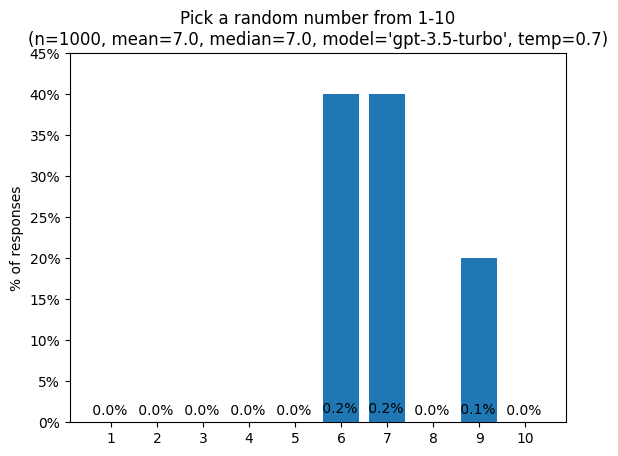

In [49]:
import matplotlib.pyplot as plt
import numpy as np 

fig, ax = plt.subplots()
x = [i for i in range(1,11)]
y = [serie_rn_pct[i] if i in serie_rn_pct.index else 0 for i in range(1,11)]
ax.bar(x, y)
for i, val in enumerate(df_final["counters_percentage"]):
    ax.text(i+.5, val+1, f" {val:.1f}%")
ax.set_title(f"Pick a random number from 1-10\n(n=1000, mean={np.mean(df_random_numbers['random_numbers'])}, median={np.median(df_random_numbers['random_numbers'])}, model='gpt-3.5-turbo', temp=0.7)")
ax.set_xticks([i for i in range(1,11)])
ax.set_yticks([5*i for i in range(10)])
ax.set_yticklabels([f"{5*i}%" for i in range(10)])
ax.set_ylabel("% of responses")
plt.savefig(f"random.png", dpi=700, bbox_inches='tight', format='png')